In [1]:
from IPython.display import clear_output

In [2]:
!pip install openmim
!mim install mmdet
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -q -e .

clear_output(wait=True)
print('Done!')

Done!


In [11]:
!conda install -y gdown

clear_output(wait=True)
print('Done!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.9.0             |     pyhd8ed1ab_0          13 KB  conda-forge
    gdown-4.6.0                |     pyhd8ed1ab_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          31 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.9.0-pyhd8ed1ab_0 None
  gdown              conda-forge/noarch::gdown-4.6.0-pyhd8ed1ab_0 None



gdown-4.6.0          | 18 KB     | ##############################

In [15]:
!gdown --id 1R0ZvtSy0cE1qOsrwU3CYlMlupWKA3tSe -O /kaggle/working/

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1R0ZvtSy0cE1qOsrwU3CYlMlupWKA3tSe
To: /kaggle/working/weapons-in-images-segmented-videos.zip
100%|███████████████████████████████████████| 1.27G/1.27G [00:06<00:00, 207MB/s]


In [16]:
!unzip /kaggle/working/weapons-in-images-segmented-videos.zip -d /kaggle/working/

clear_output(wait=True)
print('Done!')

Done!


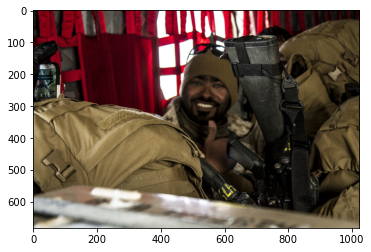

In [17]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread("/kaggle/working/Weapons-in-Images/Weapons-in-Images/000731dd242627f2.jpg")
plt.imshow(mmcv.bgr2rgb(img))
plt.show();

512 440 192 205
608 77 290 558


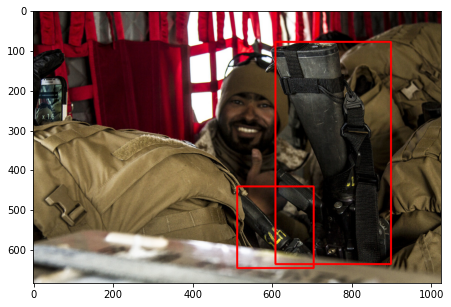

In [18]:
import cv2
import matplotlib.pyplot as plt

bb = mmcv.list_from_file("/kaggle/working/Weapons-in-Images/Weapons-in-Images/000731dd242627f2.txt")
content = [line.strip().split(" ") for line in bb]

bboxes = [[float(info) for info in x[1:]] for x in content]

def plot_preds(numpy_img, boxes):

    image = mmcv.imread(numpy_img)
    height, width = image.shape[:2]
    #print(height, width)

    for box in boxes:

        # transform from yolo format to coco
        width_coco = int(float(box[2]) * width)
        height_coco = int(float(box[3]) * height)
        x_coco = int(float(box[0]) * width - width_coco / 2)
        y_coco = int(float(box[1]) * height - height_coco / 2)

        print(x_coco, y_coco, width_coco, height_coco)
        
        numpy_img = cv2.rectangle(numpy_img, (x_coco, y_coco), (x_coco + width_coco, y_coco + height_coco), 255, 3)
        #numpy_img
        #print(box)

    
    return numpy_img

img = cv2.cvtColor(cv2.imread("/kaggle/working/Weapons-in-Images/Weapons-in-Images/000731dd242627f2.jpg"), cv2.COLOR_BGR2RGB)


boxes_img = plot_preds(img, bboxes)
plt.figure(figsize=(12, 5))
plt.imshow(boxes_img.astype("uint"));

In [19]:
from pathlib import Path

path = Path("/kaggle/working/Weapons-in-Images/Weapons-in-Images")

In [20]:
import os

#images = [image_name[:image_name.rfind(".")] for image_name in os.listdir("/content/Weapons-in-Images/Weapons-in-Images") if image_name.endswith(".jpg")]
boxes = [box_name[:box_name.rfind(".")] for box_name in os.listdir(path) if box_name.endswith(".txt") and box_name.count("New Text Document") == 0 and os.stat(f"{path}/{box_name}").st_size != 0]
len(boxes)

4346

In [21]:
def coco_format_and_clear():

    names = []

    for name in boxes:

        new_boxes = []

        image = mmcv.imread(f"{path}/{name}.jpg")
        height, width = image.shape[:2]
        boxes_dict = mmcv.list_from_file(f"{path}/{name}.txt")
        content = [line.strip().split(" ") for line in boxes_dict]
        for box in content:
            
            box[3] = float(box[3]) * width
            box[4] = float(box[4]) * height
            box[1] = float(box[1]) * width - box[3] / 2
            box[2] = float(box[2]) * height - box[4] / 2
            
            if all([el >= 0 for el in box[1:]]) and all([el >= 1 for el in box[3:]]):
                s = " ".join([box[0], str(box[1]), str(box[2]), str(box[1] + box[3]), str(box[2] + box[4])])
                print(s)
                new_boxes.append(s)
            
            if box[3] < 1 or box[4] < 1:
                print("ALARM!!!", name, box[3], box[4])

        if len(new_boxes) != 0:
            names.append(name)
            with open(f"{path}/{name}.txt", 'w') as f:
                for line in new_boxes:
                    f.write(line)
                    f.write('\n')

    return names

In [22]:
names = coco_format_and_clear()

clear_output(wait=True)
print('Done!')

print(len(names))

Done!
4239


In [23]:
len(names)

4239

In [24]:
import random

val_data = []

while len(val_data) != round(len(names)*0.25):
    rand_im = random.choice(names)
    val_data.append(rand_im)
    names.remove(rand_im)

print(f"boxes len = {len(names)}")
print(f"val_data len = {len(val_data)}")

boxes len = 3391
val_data len = 848


In [25]:
random.shuffle(names)
with open('/kaggle/working/Weapons-in-Images/train.txt', 'w') as f:
    for line in names:
        f.write(line)
        f.write('\n')

In [26]:
with open('/kaggle/working/Weapons-in-Images/val.txt', 'w') as f:
    for line in val_data:
        f.write(line)
        f.write('\n')

In [28]:
!mkdir /kaggle/working/mmdetection/checkpoints

!wget -c https://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20210803_015428-d231a06e.pth \
      -O checkpoints/ssd300_coco_20210803_015428-d231a06e.pth

--2023-01-28 22:00:07--  https://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20210803_015428-d231a06e.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.208, 8.48.85.211, 8.48.85.213, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137242646 (131M) [application/octet-stream]
Saving to: ‘checkpoints/ssd300_coco_20210803_015428-d231a06e.pth’

checkpoints/ssd300_ 100%[===================>] 130.88M  15.9MB/s    in 8.5s    

2023-01-28 22:00:16 (15.4 MB/s) - ‘checkpoints/ssd300_coco_20210803_015428-d231a06e.pth’ saved [137242646/137242646]



In [36]:
import mmcv
import numpy as np
import os.path as osp

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset


@DATASETS.register_module(name=None, force=True)
#@DATASETS.register_module(name=None, force=False)
class WeaponDataset(CustomDataset):

    CLASSES = ("Weapon",)

    def load_annotations(self, ann_file):
        
        label2ct = {k: i for i, k in enumerate(self.CLASSES)}
        
        #load image list from file
        
        image_list = mmcv.list_from_file(ann_file)

        print(len(image_list))

        data_infos = []
        
        #convert annotations to middle format
        
        for image_id in image_list:

            #print(image_id)
            
            filename = f"{self.img_prefix}/{image_id}.jpg"
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
            
            data_info = dict(
                filename=f"{image_id}.jpg",
                width=width,
                height=height
            )
            
            # load annotations

            lines = mmcv.list_from_file(f"{self.img_prefix}/{image_id}.txt")
            content = [line.strip().split(" ") for line in lines]

            bbox_names = [int(x[0]) for x in content]
            bboxes = [[float(info) for info in x[1:]] for x in content]
     
            gt_bboxes = []
            gt_labels = []
            #gt_bboxes_ignore = []
            #gt_labels_ignore = []
            
            for bbox_name, bbox in zip(bbox_names, bboxes):
                gt_labels.append(bbox_name)
                gt_bboxes.append(bbox)
                #print(bboxes)

            #print("-"*20)
            #print(f"Filename {filename}")
            #print(f"Boxes {gt_bboxes}")
            #print(f"Labels {gt_labels}")
            
            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                #bboxes=np.array(gt_bboxes, dtype=np.float32),
                labels=np.array(gt_labels, dtype=np.long)
            )
            
            data_info.update(ann=data_anno)

            #print(data_info)

            data_infos.append(data_info)


        return data_infos

In [37]:
from mmcv import Config
cfg = Config.fromfile("/kaggle/working/mmdetection/configs/ssd/ssd300_coco.py")

In [38]:
print(f'Config:\n{cfg.pretty_text}')
#cfg

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    backbone=dict(
        type='SSDVGG',
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://vgg16_caffe')),
    neck=dict(
        type='SSDNeck',
        in_channels=(512, 1024),
        out_channels=(512, 1024, 512, 256, 256, 256),
        level_strides=(2, 2, 1, 1),
        level_paddings=(1, 1, 0, 0),
        l2_norm_scale=20),
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=80,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(

In [39]:
from mmdet.apis import set_random_seed

#Modify dataset type and path

dataset_name = "WeaponDataset"
data_root_path = "/kaggle/working/Weapons-in-Images/"
data_train = "/kaggle/working/Weapons-in-Images/train.txt"
data_val = "/kaggle/working/Weapons-in-Images/val.txt"
data_prefix = "/kaggle/working/Weapons-in-Images/Weapons-in-Images"

cfg.dataset_type = dataset_name
cfg.data_root = data_root_path

cfg.data.test.type = dataset_name
cfg.data.test.data_root = data_root_path
cfg.data.test.ann_file = data_train
cfg.data.test.img_prefix = data_prefix

cfg.data.train.dataset.type = dataset_name
cfg.data.train.dataset.data_root = data_root_path
cfg.data.train.dataset.ann_file = data_train
cfg.data.train.dataset.img_prefix = data_prefix

cfg.data.val.type = dataset_name
cfg.data.val.data_root = data_root_path
cfg.data.val.ann_file = data_val
cfg.data.val.img_prefix = data_prefix

# modify num classes of the model in box head
cfg.model.bbox_head.num_classes = 1

cfg.load_from = "/kaggle/working/mmdetection/checkpoints/ssd300_coco_20210803_015428-d231a06e.pth"
cfg.work_dir = "/kaggle/working/tutorial_exps"

cfg.optimizer.lr = 0.02 / 8.
#cfg.optimizer.lr = 3e-3

#cfg.lr_config.warmup = None
cfg.lr_config.warmup_ratio = 1 / 1e10
#cfg.lr_config.warmup_iters = 1000
cfg.log_config.interval = 10

cfg.evaluation.metric = "mAP"
cfg.evaluation.interval = 2
cfg.checkpoint_config.interval = 2

#cfg.optimizer_config=dict(_delete_=True, grad_clip=dict(max_norm=35, norm_type=2))

cfg.runner.max_epochs = 12

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    backbone=dict(
        type='SSDVGG',
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://vgg16_caffe')),
    neck=dict(
        type='SSDNeck',
        in_channels=(512, 1024),
        out_channels=(512, 1024, 512, 256, 256, 256),
        level_strides=(2, 2, 1, 1),
        level_paddings=(1, 1, 0, 0),
        l2_norm_scale=20),
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=1,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(


In [40]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset

datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

3391


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [41]:
train_detector(model, datasets, cfg, distributed=False, validate=True)

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2023-01-28 22:14:06,658 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `n

848


2023-01-28 22:14:15,774 - mmdet - INFO - load checkpoint from local path: /kaggle/working/mmdetection/checkpoints/ssd300_coco_20210803_015428-d231a06e.pth
2023-01-28 22:14:15,871 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.cls_convs.0.0.weight: copying a param with shape torch.Size([324, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([8, 512, 3, 3]).
size mismatch for bbox_head.cls_convs.0.0.bias: copying a param with shape torch.Size([324]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for bbox_head.cls_convs.1.0.weight: copying a param with shape torch.Size([486, 1024, 3, 3]) from checkpoint, the shape in current model is torch.Size([12, 1024, 3, 3]).
size mismatch for bbox_head.cls_convs.1.0.bias: copying a param with shape torch.Size([486]) from checkpoint, the shape in current model is torch.Size([12]).
size mismatch for bbox_head.cls_convs.2.0.weight: copying a param w

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 848/848, 37.2 task/s, elapsed: 23s, ETA:     0s
---------------iou_thr: 0.5---------------


2023-01-28 22:41:32,750 - mmdet - INFO - 
+--------+------+--------+--------+-------+
| class  | gts  | dets   | recall | ap    |
+--------+------+--------+--------+-------+
| Weapon | 1751 | 169600 | 0.789  | 0.512 |
+--------+------+--------+--------+-------+
| mAP    |      |        |        | 0.512 |
+--------+------+--------+--------+-------+
2023-01-28 22:41:32,755 - mmdet - INFO - Epoch(val) [2][848]	AP50: 0.5120, mAP: 0.5123
2023-01-28 22:41:40,045 - mmdet - INFO - Epoch [3][10/2120]	lr: 2.500e-03, eta: 2:14:11, time: 0.710, data_time: 0.404, memory: 9377, loss_cls: 2.2076, loss_bbox: 1.4000, loss: 3.6076
2023-01-28 22:41:43,733 - mmdet - INFO - Epoch [3][20/2120]	lr: 2.500e-03, eta: 2:14:07, time: 0.368, data_time: 0.054, memory: 9377, loss_cls: 2.1610, loss_bbox: 1.5847, loss: 3.7457
2023-01-28 22:41:47,726 - mmdet - INFO - Epoch [3][30/2120]	lr: 2.500e-03, eta: 2:14:04, time: 0.399, data_time: 0.116, memory: 9377, loss_cls: 2.1749, loss_bbox: 1.5391, loss: 3.7140
2023-01-28 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 848/848, 36.1 task/s, elapsed: 23s, ETA:     0s
---------------iou_thr: 0.5---------------


2023-01-28 23:08:38,835 - mmdet - INFO - 
+--------+------+--------+--------+-------+
| class  | gts  | dets   | recall | ap    |
+--------+------+--------+--------+-------+
| Weapon | 1751 | 169600 | 0.833  | 0.570 |
+--------+------+--------+--------+-------+
| mAP    |      |        |        | 0.570 |
+--------+------+--------+--------+-------+
2023-01-28 23:08:38,841 - mmdet - INFO - Epoch(val) [4][848]	AP50: 0.5700, mAP: 0.5703
2023-01-28 23:08:45,965 - mmdet - INFO - Epoch [5][10/2120]	lr: 2.500e-03, eta: 1:46:58, time: 0.693, data_time: 0.362, memory: 9377, loss_cls: 2.0128, loss_bbox: 1.2931, loss: 3.3059
2023-01-28 23:08:49,811 - mmdet - INFO - Epoch [5][20/2120]	lr: 2.500e-03, eta: 1:46:55, time: 0.385, data_time: 0.088, memory: 9377, loss_cls: 2.1050, loss_bbox: 1.3237, loss: 3.4287
2023-01-28 23:08:54,116 - mmdet - INFO - Epoch [5][30/2120]	lr: 2.500e-03, eta: 1:46:52, time: 0.432, data_time: 0.107, memory: 9377, loss_cls: 2.0728, loss_bbox: 1.5042, loss: 3.5770
2023-01-28 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 848/848, 36.9 task/s, elapsed: 23s, ETA:     0s
---------------iou_thr: 0.5---------------


2023-01-28 23:35:42,078 - mmdet - INFO - 
+--------+------+--------+--------+-------+
| class  | gts  | dets   | recall | ap    |
+--------+------+--------+--------+-------+
| Weapon | 1751 | 169600 | 0.831  | 0.570 |
+--------+------+--------+--------+-------+
| mAP    |      |        |        | 0.570 |
+--------+------+--------+--------+-------+
2023-01-28 23:35:42,083 - mmdet - INFO - Epoch(val) [6][848]	AP50: 0.5700, mAP: 0.5699
2023-01-28 23:35:48,845 - mmdet - INFO - Epoch [7][10/2120]	lr: 2.500e-03, eta: 1:20:04, time: 0.656, data_time: 0.367, memory: 9377, loss_cls: 1.9305, loss_bbox: 1.0708, loss: 3.0013
2023-01-28 23:35:52,561 - mmdet - INFO - Epoch [7][20/2120]	lr: 2.500e-03, eta: 1:20:00, time: 0.372, data_time: 0.047, memory: 9377, loss_cls: 1.9112, loss_bbox: 1.0270, loss: 2.9382
2023-01-28 23:35:56,275 - mmdet - INFO - Epoch [7][30/2120]	lr: 2.500e-03, eta: 1:19:56, time: 0.372, data_time: 0.041, memory: 9377, loss_cls: 2.0526, loss_bbox: 1.3260, loss: 3.3786
2023-01-28 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 848/848, 35.8 task/s, elapsed: 24s, ETA:     0s
---------------iou_thr: 0.5---------------


2023-01-29 00:02:41,631 - mmdet - INFO - 
+--------+------+--------+--------+-------+
| class  | gts  | dets   | recall | ap    |
+--------+------+--------+--------+-------+
| Weapon | 1751 | 169600 | 0.830  | 0.587 |
+--------+------+--------+--------+-------+
| mAP    |      |        |        | 0.587 |
+--------+------+--------+--------+-------+
2023-01-29 00:02:41,636 - mmdet - INFO - Epoch(val) [8][848]	AP50: 0.5870, mAP: 0.5866
2023-01-29 00:02:48,585 - mmdet - INFO - Epoch [9][10/2120]	lr: 2.500e-03, eta: 0:53:17, time: 0.676, data_time: 0.366, memory: 9377, loss_cls: 1.7955, loss_bbox: 0.8946, loss: 2.6901
2023-01-29 00:02:52,539 - mmdet - INFO - Epoch [9][20/2120]	lr: 2.500e-03, eta: 0:53:13, time: 0.395, data_time: 0.066, memory: 9377, loss_cls: 1.7305, loss_bbox: 0.9175, loss: 2.6480
2023-01-29 00:02:56,154 - mmdet - INFO - Epoch [9][30/2120]	lr: 2.500e-03, eta: 0:53:09, time: 0.362, data_time: 0.041, memory: 9377, loss_cls: 2.0726, loss_bbox: 1.0607, loss: 3.1333
2023-01-29 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 848/848, 36.7 task/s, elapsed: 23s, ETA:     0s
---------------iou_thr: 0.5---------------


2023-01-29 00:29:44,234 - mmdet - INFO - 
+--------+------+--------+--------+-------+
| class  | gts  | dets   | recall | ap    |
+--------+------+--------+--------+-------+
| Weapon | 1751 | 169600 | 0.810  | 0.576 |
+--------+------+--------+--------+-------+
| mAP    |      |        |        | 0.576 |
+--------+------+--------+--------+-------+
2023-01-29 00:29:44,239 - mmdet - INFO - Epoch(val) [10][848]	AP50: 0.5760, mAP: 0.5760
2023-01-29 00:29:52,271 - mmdet - INFO - Epoch [11][10/2120]	lr: 2.500e-03, eta: 0:26:36, time: 0.785, data_time: 0.473, memory: 9377, loss_cls: 1.8866, loss_bbox: 1.1118, loss: 2.9985
2023-01-29 00:29:56,226 - mmdet - INFO - Epoch [11][20/2120]	lr: 2.500e-03, eta: 0:26:32, time: 0.395, data_time: 0.121, memory: 9377, loss_cls: 1.8840, loss_bbox: 0.9780, loss: 2.8620
2023-01-29 00:29:59,888 - mmdet - INFO - Epoch [11][30/2120]	lr: 2.500e-03, eta: 0:26:28, time: 0.366, data_time: 0.048, memory: 9377, loss_cls: 1.9230, loss_bbox: 1.0295, loss: 2.9525
2023-01

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 848/848, 35.6 task/s, elapsed: 24s, ETA:     0s
---------------iou_thr: 0.5---------------


2023-01-29 00:56:38,540 - mmdet - INFO - 
+--------+------+--------+--------+-------+
| class  | gts  | dets   | recall | ap    |
+--------+------+--------+--------+-------+
| Weapon | 1751 | 169600 | 0.834  | 0.602 |
+--------+------+--------+--------+-------+
| mAP    |      |        |        | 0.602 |
+--------+------+--------+--------+-------+
2023-01-29 00:56:38,546 - mmdet - INFO - Epoch(val) [12][848]	AP50: 0.6020, mAP: 0.6024


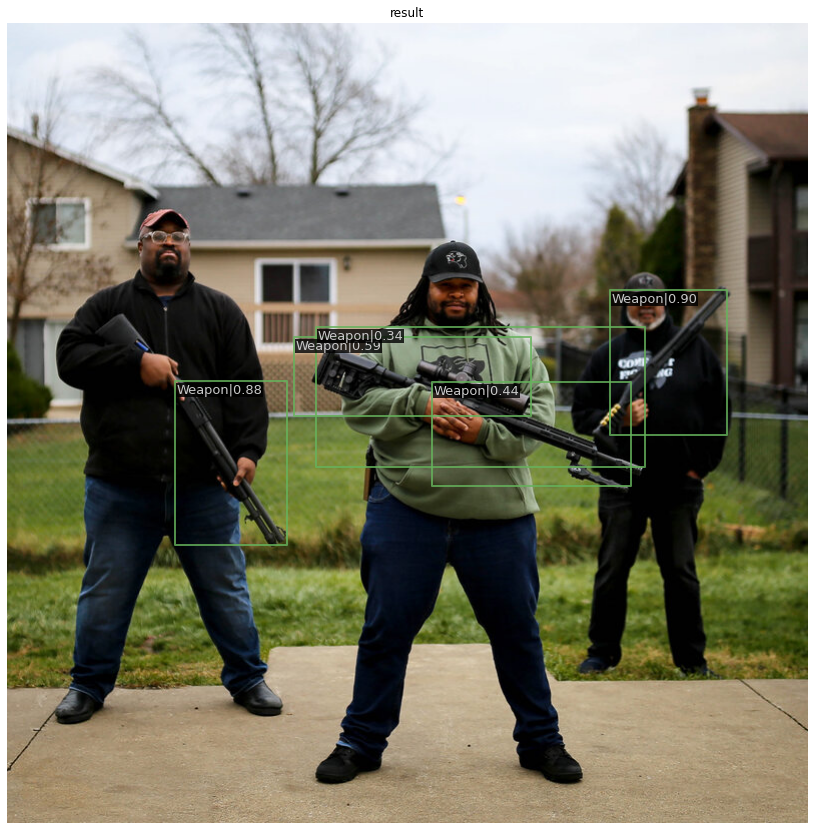

In [43]:
from mmdet.apis import inference_detector, show_result_pyplot

img = mmcv.imread('/kaggle/input/example2/oobineme_nprthetrace_group_sq-1a013c6efff0017600fe77ca755070307daf1c49-s800-c85.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [44]:
!ls /kaggle/working/tutorial_exps

None.log.json  epoch_12.pth  epoch_4.pth  epoch_8.pth  tf_logs
epoch_10.pth   epoch_2.pth   epoch_6.pth  latest.pth


In [52]:
!zip -r /kaggle/working/training_result.zip /kaggle/working/tutorial_exps

  adding: kaggle/working/tutorial_exps/ (stored 0%)
  adding: kaggle/working/tutorial_exps/epoch_10.pth (deflated 7%)
  adding: kaggle/working/tutorial_exps/None.log.json (deflated 87%)
  adding: kaggle/working/tutorial_exps/epoch_6.pth (deflated 7%)
  adding: kaggle/working/tutorial_exps/tf_logs/ (stored 0%)
  adding: kaggle/working/tutorial_exps/tf_logs/events.out.tfevents.1674944060.099c8e4f6dce.23.0 (deflated 72%)
  adding: kaggle/working/tutorial_exps/epoch_2.pth (deflated 7%)
  adding: kaggle/working/tutorial_exps/latest.pth (deflated 7%)
  adding: kaggle/working/tutorial_exps/epoch_12.pth (deflated 7%)
  adding: kaggle/working/tutorial_exps/epoch_4.pth (deflated 7%)
  adding: kaggle/working/tutorial_exps/epoch_8.pth (deflated 7%)


In [54]:
!cd /kaggle/working/

In [56]:
!ls /kaggle/working/

'Weapon in Images (Segmented Video)'   training_result.zip
 Weapons-in-Images		       tutorial_exps
 __notebook_source__.ipynb	      'view?usp=share_link'
 mmdetection			       weapons-in-images-segmented-videos.zip


In [58]:
from IPython.display import FileLink
FileLink(r'training_result.zip')

/kaggle/working/mmdetection/training_result.zip